<a href="https://colab.research.google.com/github/Ushamenda23/calculTE/blob/main/wine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/archive (21).zip')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

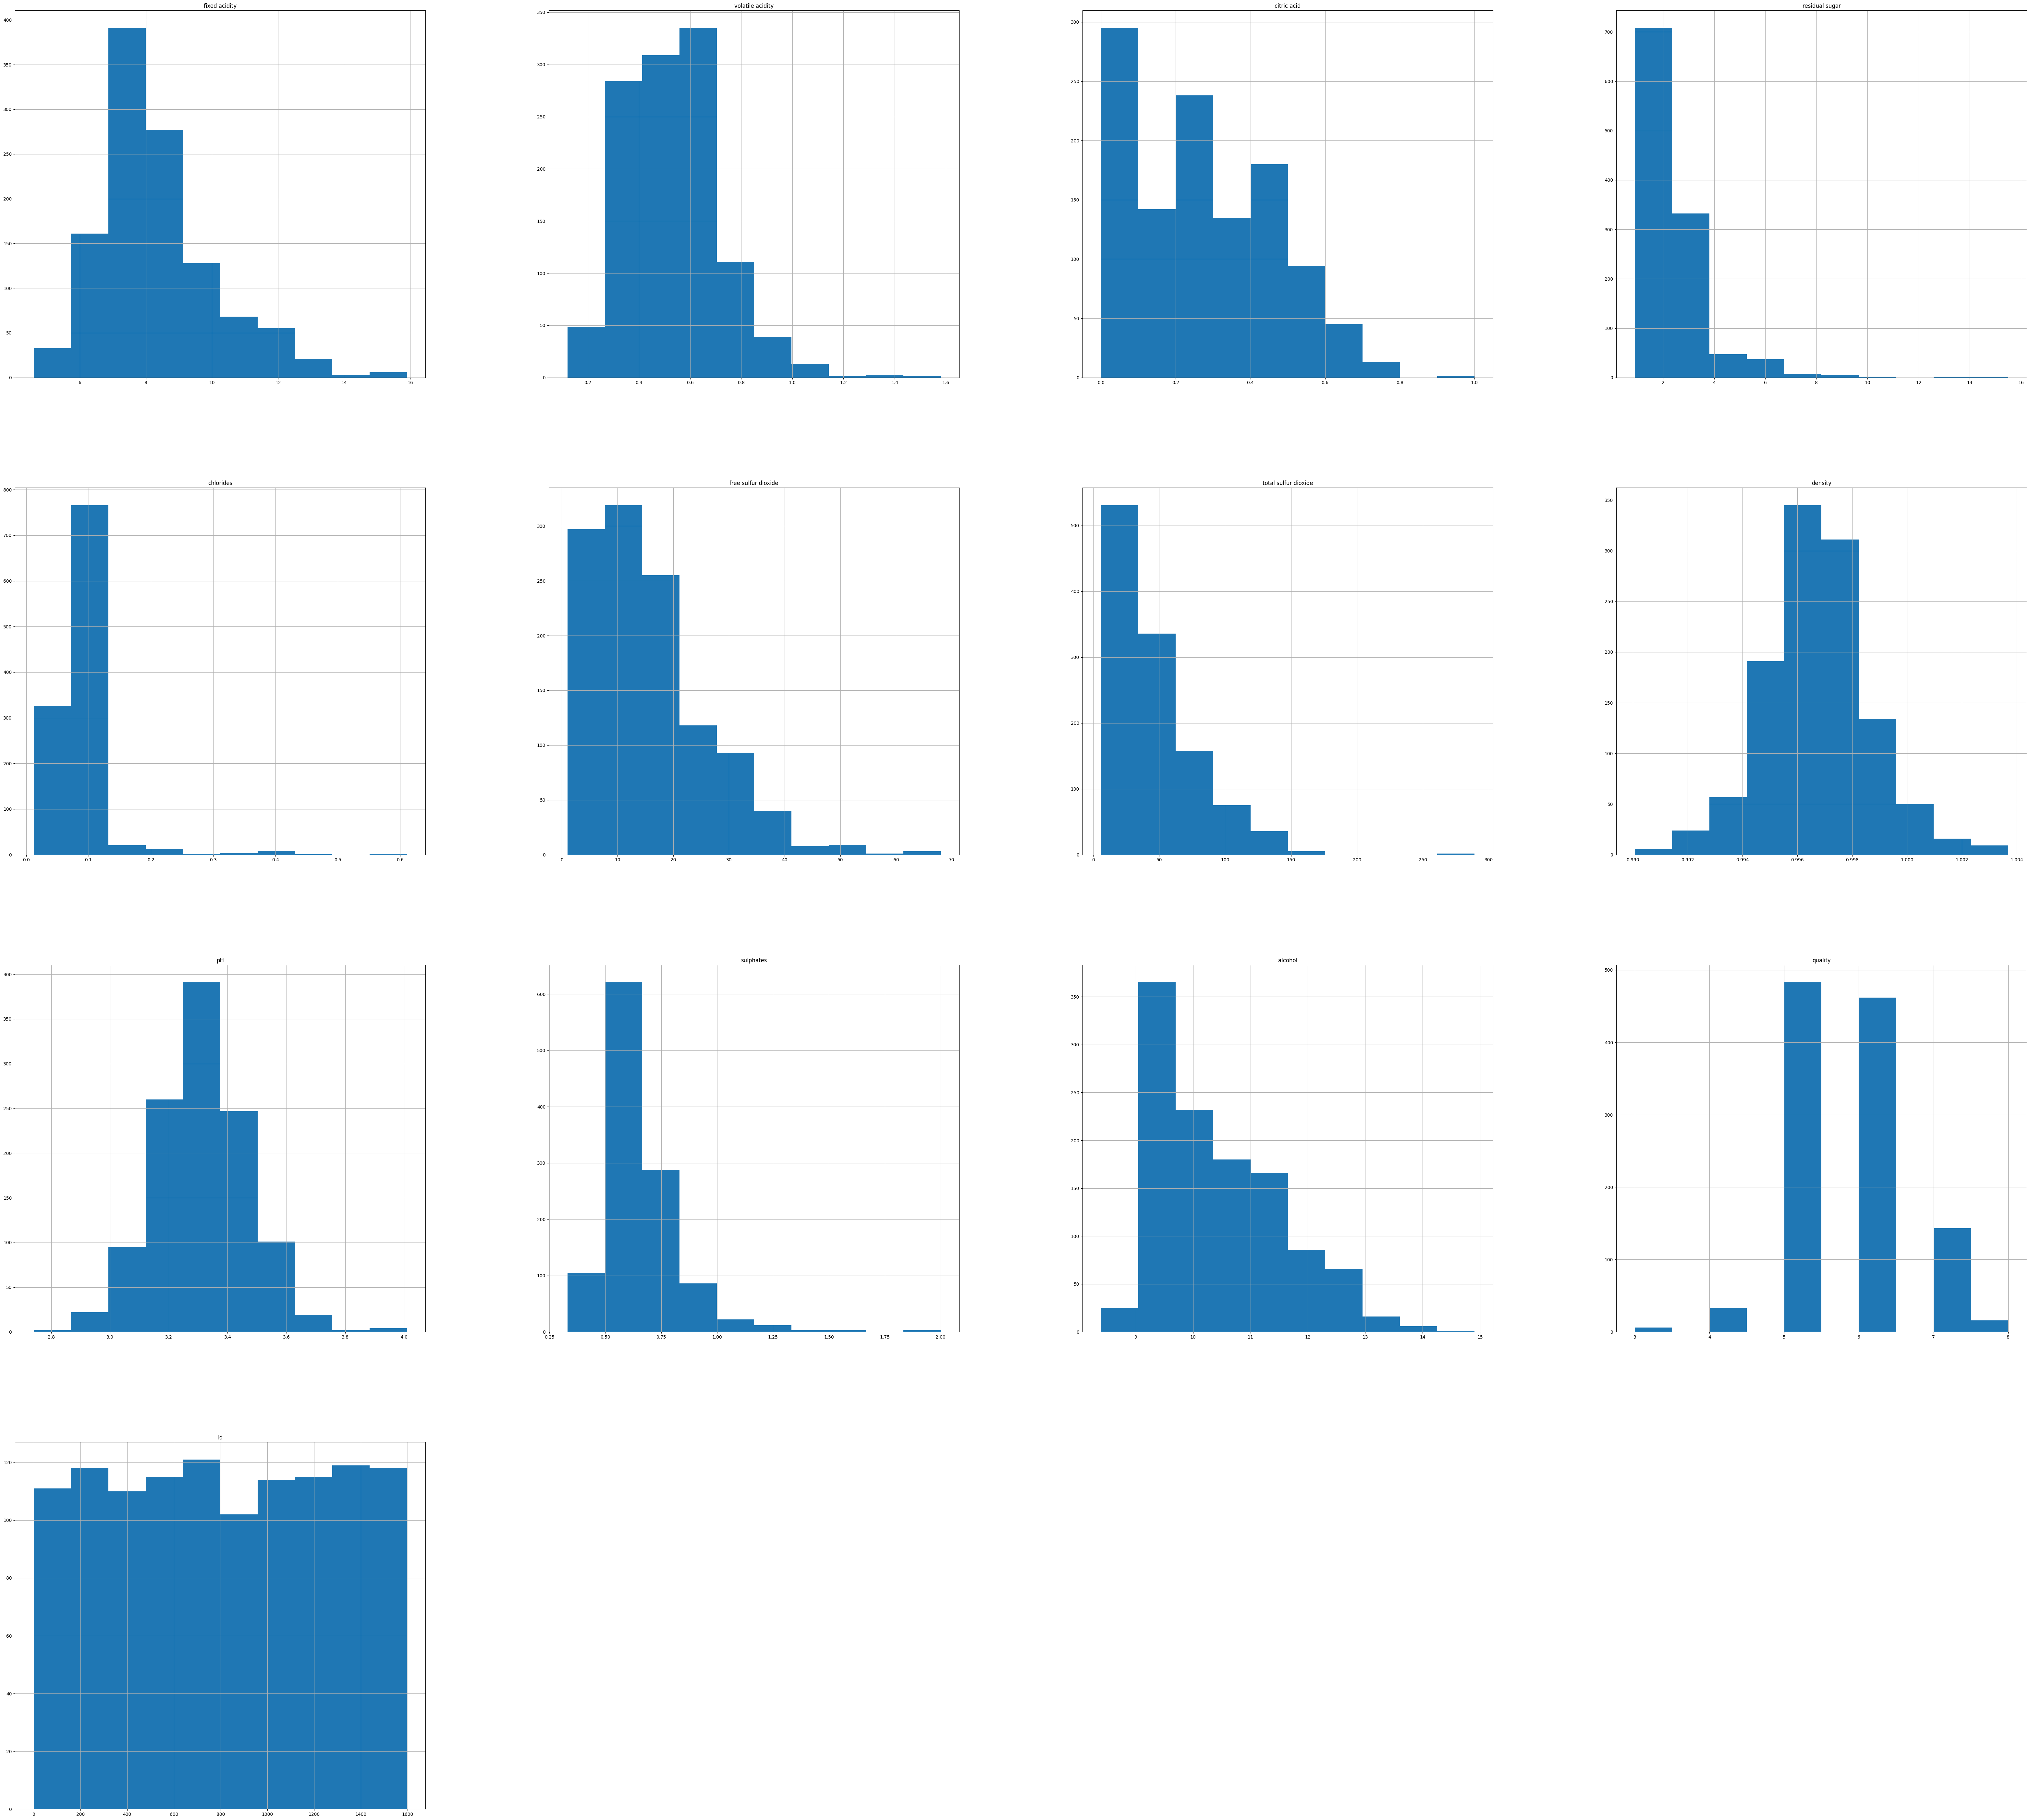

In [ ]:
df.hist(bins=10,figsize=(80,72))
plt.show()

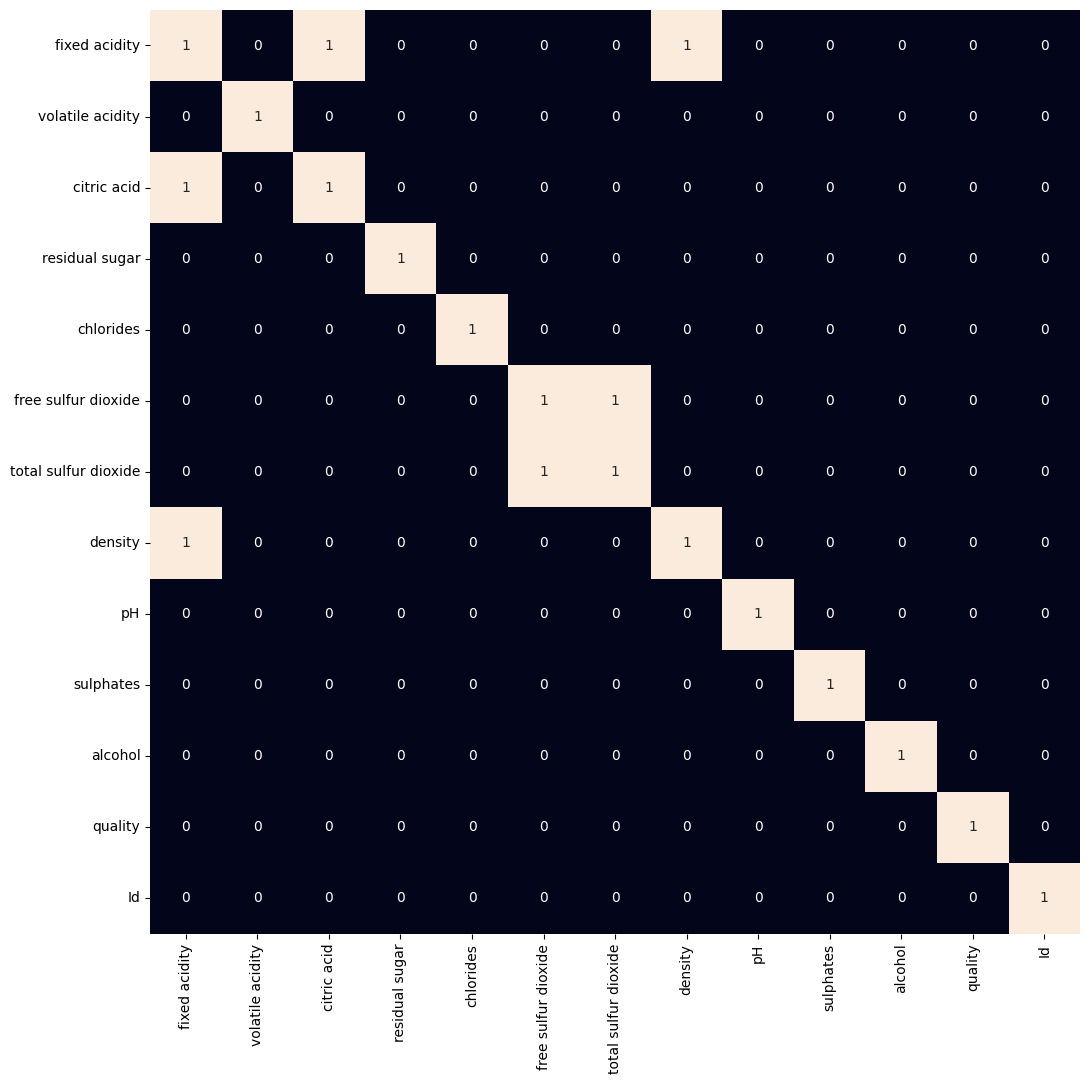

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()>0.6,annot=True,cbar=False)
plt.show()


In [ ]:
df=df.drop('total sulfur dioxide',axis=1)

In [ ]:
df = df.drop('total sulfur dioxide', axis=1)

KeyError: "['total sulfur dioxide'] not found in axis"

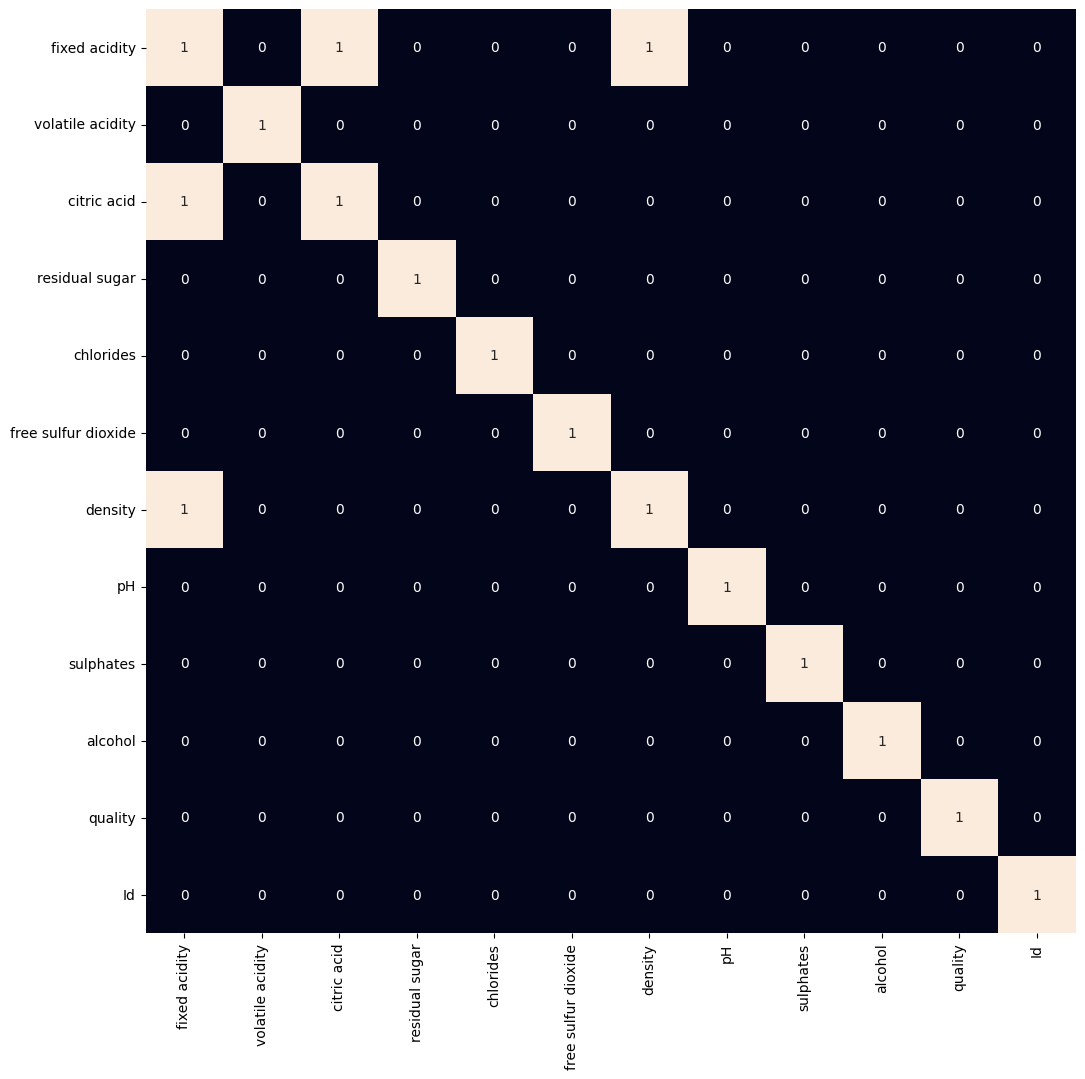

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()>0.6,annot=True,cbar=False)
plt.show()


In [ ]:
df=df.drop('free sulfur dioxide',axis=1)

KeyError: "['free sulfur dioxide'] not found in axis"

In [ ]:
df['best quality']=[1 if x>5 else 0 for x in df.quality]

In [ ]:
df.replace(
    {'blue':1,'yellow':0},inplace=True
)

In [ ]:
features=df.drop(['quality','best quality'],axis=1)
target=df['best quality']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(
    features,target,test_size=0.2,random_state=3

)
x_train.shape
x_test.shape

(229, 11)

In [ ]:
x_train.shape

(914, 11)

In [ ]:
x_test.shape

(229, 11)

In [ ]:
norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(3):
  models[i].fit(x_train,y_train)
  print(f'{models[i]}:')
  print('Training Accuracy :',metrics.roc_auc_score(y_train,models[i].predict(x_train)))
 print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(x_test)))
 print()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(x_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(x_test)))
    print()

LogisticRegression() : 


NameError: name 'xtrain' is not defined

In [ ]:
models= [ LogisticRegression ,XGBClassifier,SVC(kernel='rbf')]
for i in range(3):
 models[i].fit(x_train, y_train)

   print(f'{models[i]}:')
  print('Training Accuracy:',metrics.roc_auc_score(y_train,models[i].predict(x_train)))
  print('validation Accuracy:',metrics.roc_auc_score(y_test,models[i].predict(x_test)))
  print()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(x_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(x_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(x_test)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7532655672791365
Validation Accuracy :  0.7433353761299218

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7591542822123487

SVC() : 
Training Accuracy :  0.7679020691986382
Validation Accu

In [ ]:
metrics.plot_confusion_matrix(models[1],x_test,y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [ ]:
metrics.plot_confusion_matrix(models[1], x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [ ]:
print(metrics.classification_report(y_test,models[1].predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       107
           1       0.75      0.84      0.79       122

    accuracy                           0.76       229
   macro avg       0.77      0.76      0.76       229
weighted avg       0.77      0.76      0.76       229

